# Practical example. Audiobooks

## Problem

You are given data from an Audiobook app. Logically, it relates only to the audio versions of books. Each customer in the database has made a purchase at least once, that's why he/she is in the database. We want to create a machine learning algorithm based on our available data that can predict if a customer will buy again from the Audiobook company.

The main idea is that if a customer has a low probability of coming back, there is no reason to spend any money on advertizing to him/her. If we can focus our efforts ONLY on customers that are likely to convert again, we can make great savings. Moreover, this model can identify the most important metrics for a customer to come back again. Identifying new customers creates value and growth opportunities.

You have a .csv summarizing the data. There are several variables: Customer ID, Book length in mins_avg (average of all purchases), Book length in minutes_sum (sum of all purchases), Price Paid_avg (average of all purchases), Price paid_sum (sum of all purchases), Review (a Boolean variable), Review (out of 10), Total minutes listened, Completion (from 0 to 1), Support requests (number), and Last visited minus purchase date (in days).

So these are the inputs (excluding customer ID, as it is completely arbitrary. It's more like a name, than a number).

The targets are a Boolean variable (so 0, or 1). We are taking a period of 2 years in our inputs, and the next 6 months as targets. So, in fact, we are predicting if: based on the last 2 years of activity and engagement, a customer will convert in the next 6 months. 6 months sounds like a reasonable time. If they don't convert after 6 months, chances are they've gone to a competitor or didn't like the Audiobook way of digesting information. 

The task is simple: create a machine learning algorithm, which is able to predict if a customer will buy again. 

This is a classification problem with two classes: won't buy and will buy, represented by 0s and 1s. 

## Create the machine learning algorithm



### Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance

### Data

In [2]:
npz = np.load('Audiobooks_data_train.npz')

train_inputs = npz['inputs'].astype(float)
train_targets = npz['targets'].astype(int)

npz = np.load('Audiobooks_data_validation.npz')
validation_inputs, validation_targets = npz['inputs'].astype(float), npz['targets'].astype(int)

npz = np.load('Audiobooks_data_test.npz')
test_inputs, test_targets = npz['inputs'].astype(float), npz['targets'].astype(int)

### Model
Outline, optimizers, loss, early stopping and training

In [3]:
input_size = 10
output_size = 2
hidden_layer_size = 50
    
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), 
    tf.keras.layers.Dense(hidden_layer_size, activation='sigmoid'), 
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),  
    tf.keras.layers.Dense(output_size, activation='softmax') 
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 100
max_epochs = 100

early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

history = model.fit(train_inputs,
          train_targets,
          batch_size=batch_size,
          epochs=max_epochs,
          callbacks=[early_stopping],
          validation_data=(validation_inputs, validation_targets),
          verbose=2
          )  

Epoch 1/100
41/41 - 2s - loss: 0.6505 - accuracy: 0.6215 - val_loss: 0.5899 - val_accuracy: 0.7489 - 2s/epoch - 50ms/step
Epoch 2/100
41/41 - 0s - loss: 0.5359 - accuracy: 0.7429 - val_loss: 0.4600 - val_accuracy: 0.7848 - 175ms/epoch - 4ms/step
Epoch 3/100
41/41 - 0s - loss: 0.4331 - accuracy: 0.7730 - val_loss: 0.3867 - val_accuracy: 0.7982 - 192ms/epoch - 5ms/step
Epoch 4/100
41/41 - 0s - loss: 0.3863 - accuracy: 0.7854 - val_loss: 0.3522 - val_accuracy: 0.8117 - 166ms/epoch - 4ms/step
Epoch 5/100
41/41 - 0s - loss: 0.3681 - accuracy: 0.8023 - val_loss: 0.3353 - val_accuracy: 0.8296 - 191ms/epoch - 5ms/step
Epoch 6/100
41/41 - 0s - loss: 0.3527 - accuracy: 0.8073 - val_loss: 0.3433 - val_accuracy: 0.7982 - 167ms/epoch - 4ms/step
Epoch 7/100
41/41 - 0s - loss: 0.3440 - accuracy: 0.8048 - val_loss: 0.3292 - val_accuracy: 0.8072 - 152ms/epoch - 4ms/step
Epoch 8/100
41/41 - 0s - loss: 0.3438 - accuracy: 0.8033 - val_loss: 0.3257 - val_accuracy: 0.8296 - 144ms/epoch - 4ms/step
Epoch 9/10

## Test the model

After training on the training data and validating on the validation data, we test the final prediction power of our model by running it on the test dataset that the algorithm has NEVER seen before.

In [4]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

8/8 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8044


In [11]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.38. Test accuracy: 80.44%


### Visualization

Plot the training and validation loss.

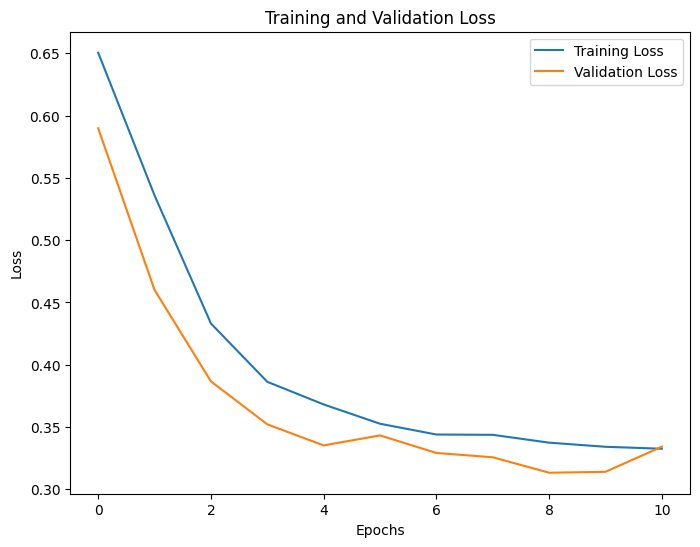

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plot the training and validation accuracy.

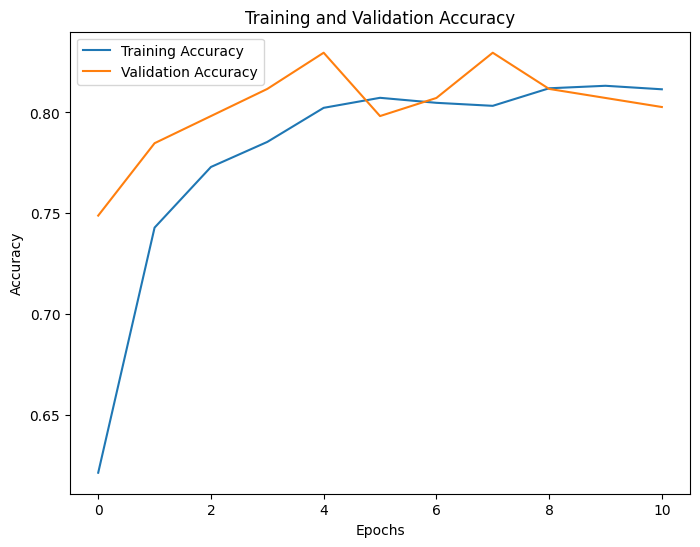

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Plot the confusion matrix.

8/8 [==============================] - 0s 3ms/step


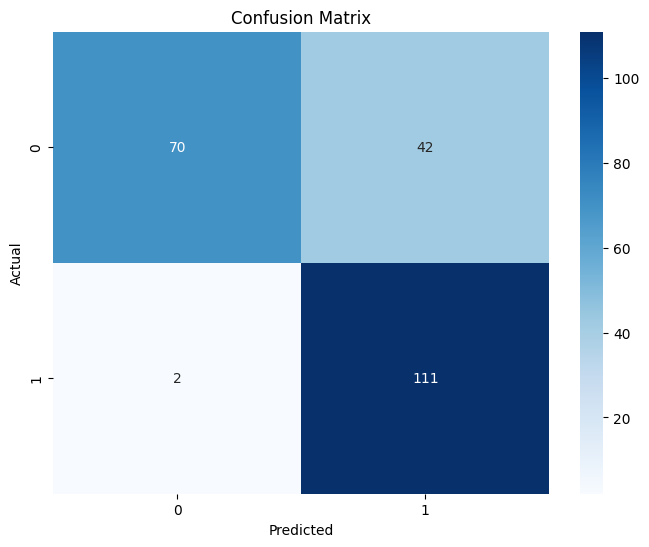

In [8]:
y_pred = model.predict(test_inputs)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test_targets, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Plot the ROC curve.

8/8 [==============================] - 0s 1ms/step


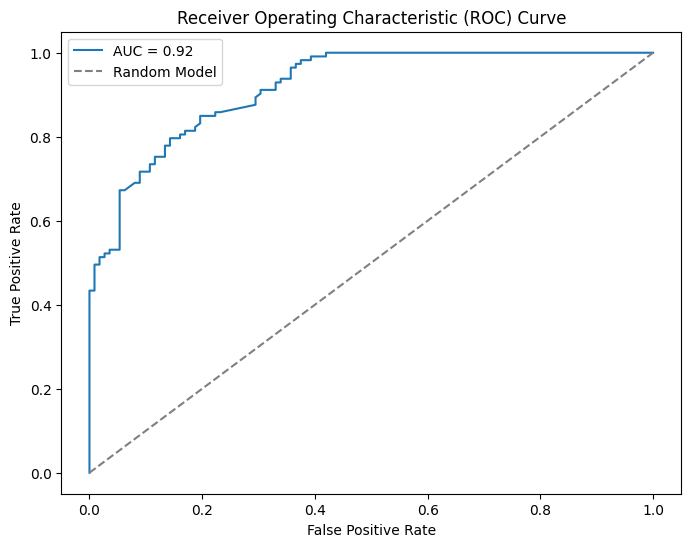

In [9]:
y_pred_proba = model.predict(test_inputs)[:, 1]

fpr, tpr, thresholds = roc_curve(test_targets, y_pred_proba)

auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Model')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()